In [32]:
import os
import pandas as pd
import tensorflow as tf

In [24]:
RAV = "/Users/dev/Desktop/Speech_Emotion_Detection-master/speech-emotion-recognition-ravdess-data/"

In [25]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,angry,/Users/dev/Desktop/Speech_Emotion_Detection-ma...
1,fear,/Users/dev/Desktop/Speech_Emotion_Detection-ma...
2,fear,/Users/dev/Desktop/Speech_Emotion_Detection-ma...
3,angry,/Users/dev/Desktop/Speech_Emotion_Detection-ma...
4,disgust,/Users/dev/Desktop/Speech_Emotion_Detection-ma...


<AxesSubplot:ylabel='labels'>

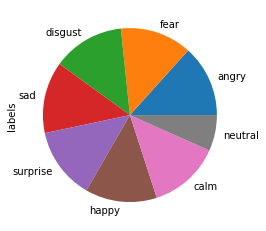

In [29]:
RavFemales_df["labels"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='labels'>

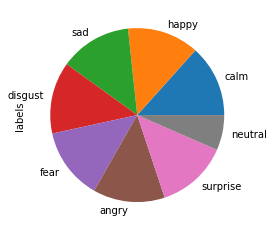

In [30]:
RavMales_df["labels"].value_counts().plot(kind="pie")

In [33]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [35]:
RavMales_df["path"][0]

'/Users/dev/Desktop/Speech_Emotion_Detection-master/speech-emotion-recognition-ravdess-data/Actor_11/03-01-01-01-02-02-11.wav'

In [40]:
import pyaudio  
import wave  

#define stream chunk   
chunk = 1024  

#open a wav format music  
f = wave.open(RavMales_df["path"][0])  
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = f.readframes(chunk)  

#play stream  
while data:  
    stream.write(data)  
    data = f.readframes(chunk)  

#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate()  